Touring female artists statistics 

In [2]:
# import file and observe data 

import pandas as pd
import os

input_file = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\tourdata.csv"
output_file = r"C:\Users\ahliy\Downloads\cleaned_tourdata.csv"

df = pd.read_csv(input_file)
print(df.head())  
print(df.info())  
print(df.describe())  

text_columns = df.select_dtypes(include=['object']).columns

   Rank  Peak All Time Peak   Actual gross Adjusted gross (in 2022 dollars)  \
0     1     1             2  $780,000,000                     $780,000,000    
1     2     1          7[2]  $579,800,000                     $579,800,000    
2     3  1[4]          2[5]  $411,000,000                     $560,622,615    
3     4  2[7]         10[7]  $397,300,000                     $454,751,555    
4     5  2[4]           NaN  $345,675,146                     $402,844,849    

         Artist                   Tour title    Year(s)  Shows Average gross  \
0  Taylor Swift              The Eras Tour †  2023–2024     56  $13,928,571    
1       Beyoncé       Renaissance World Tour       2023     56  $10,353,571    
2       Madonna  Sticky & Sweet Tour ‡[4][a]  2008–2009     85   $4,835,294    
3          Pink  Beautiful Trauma World Tour  2018–2019    156   $2,546,795    
4  Taylor Swift      Reputation Stadium Tour       2018     53   $6,522,173    

  Ref.  
0  [1]  
1  [3]  
2  [6]  
3  [7]  

In [3]:
#clean data by removing duplicates and specail charcaters

text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].replace({r'[^a-zA-Z0-9]': ''}, regex=True)


df = df.drop_duplicates()

df.fillna("Unknown", inplace=True)
df.to_csv(output_file, index=False)

if os.path.exists(output_file):
    print(f"✅ File saved successfully at {output_file}")
else:
    print("❌ File not found!")
import pymysql
import pandas as pd


df = pd.read_csv("C:/Users/ahliy/Downloads/cleaned_tourdata.csv")
for _, row in df.iterrows():
    print(row)
df.info()

✅ File saved successfully at C:\Users\ahliy\Downloads\cleaned_tourdata.csv
Rank                                          1
Peak                                          1
All Time Peak                                 2
Actual gross                          780000000
Adjusted gross (in 2022 dollars)      780000000
Artist                              TaylorSwift
Tour title                          TheErasTour
Year(s)                                20232024
Shows                                        56
Average gross                          13928571
Ref.                                          1
Name: 0, dtype: object
Rank                                                   2
Peak                                                   1
All Time Peak                                         72
Actual gross                                   579800000
Adjusted gross (in 2022 dollars)               579800000
Artist                                            Beyonc
Tour title                      

C:\Users\ahliy\AppData\Local\Temp\ipykernel_19960\3389409949.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


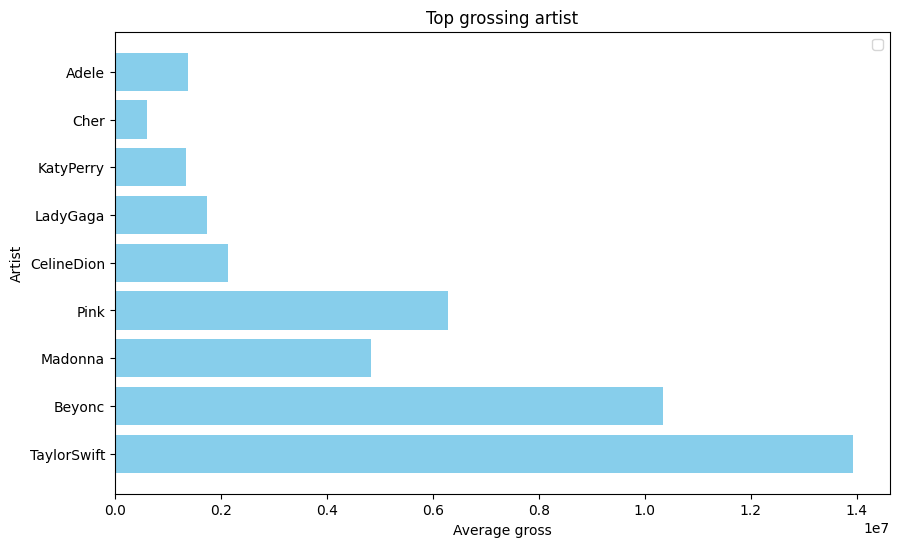

In [4]:
#visualize top grossing artists

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(df['Artist'],df['Average gross'],color='skyblue')
plt.legend()
plt.xlabel('Average gross')
plt.ylabel('Artist')
plt.title('Top grossing artist')
plt.show()

        Artist  avg_shows
0        Adele     121.00
1       Beyonc      79.00
2   CelineDion     131.00
3         Cher     325.00
4    KatyPerry     151.00
5     LadyGaga     150.50
6      Madonna      78.75
7         Pink     113.00
8  TaylorSwift      70.00


Text(0.5, 0, 'Average number of shows')

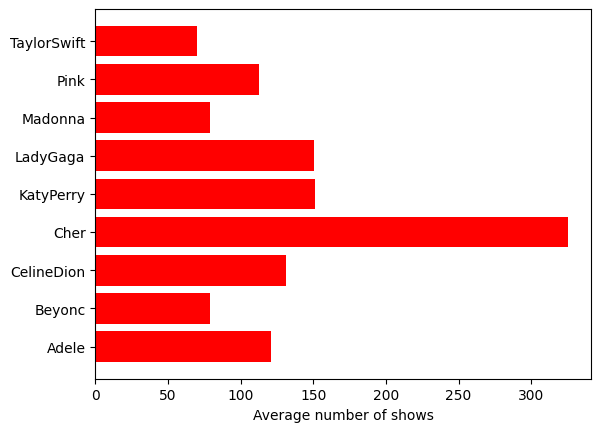

In [5]:
# averge numebr of shows per artist
avg_shows = (
    df.groupby('Artist', as_index=False)
      .agg(avg_shows=('Shows', 'mean'))
)
print(avg_shows)
plt.barh(avg_shows['Artist'],avg_shows['avg_shows'],color='red')
plt.xlabel('Average number of shows')

after cleaning the data, a bar graph is useed to help visualize the top grossing artist and amount of shows performed  where it is clear to see Taylor Swift was the highest grossing artist while Cher was the lowest and Cher played the most amount of shows and Taylor Swift played the least amount of shows.